In [ ]:
# Install dependencies
%pip install matplotlib seaborn

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
file_path = 'preprocessed/preprocessed_openstack_train.csv'  # Adjust path as needed
df = pd.read_csv(file_path)

# Convert 'timestamp' to datetime for proper time-based visualizations
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Display dataset information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137074 entries, 0 to 137073
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   timestamp                 137074 non-null  datetime64[ns]
 1   log_level                 137074 non-null  object        
 2   source                    137074 non-null  object        
 3   request_id                127082 non-null  object        
 4   user_id                   127082 non-null  object        
 5   project_id                127082 non-null  object        
 6   internal_ip               137074 non-null  object        
 7   request                   62757 non-null   object        
 8   status_code               62693 non-null   float64       
 9   response_length           62693 non-null   float64       
 10  response_time             137074 non-null  float64       
 11  time_delta                137073 non-null  float64       
 12  is

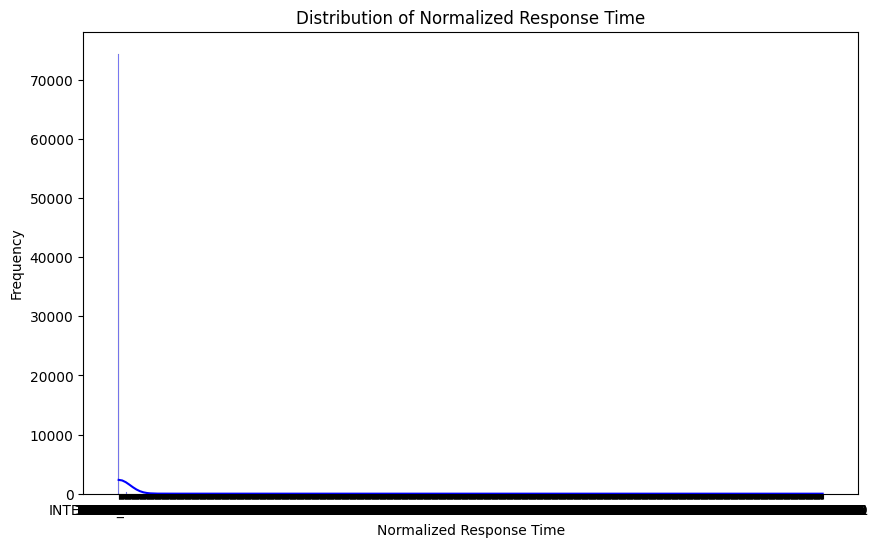

In [12]:
# Distribution of Normalized Response Time
plt.figure(figsize=(10, 6))
sns.histplot(df['internal_ip'], kde=True, color='blue', bins=30)
plt.title('Distribution of Normalized Response Time')
plt.xlabel('Normalized Response Time')
plt.ylabel('Frequency')
plt.show()


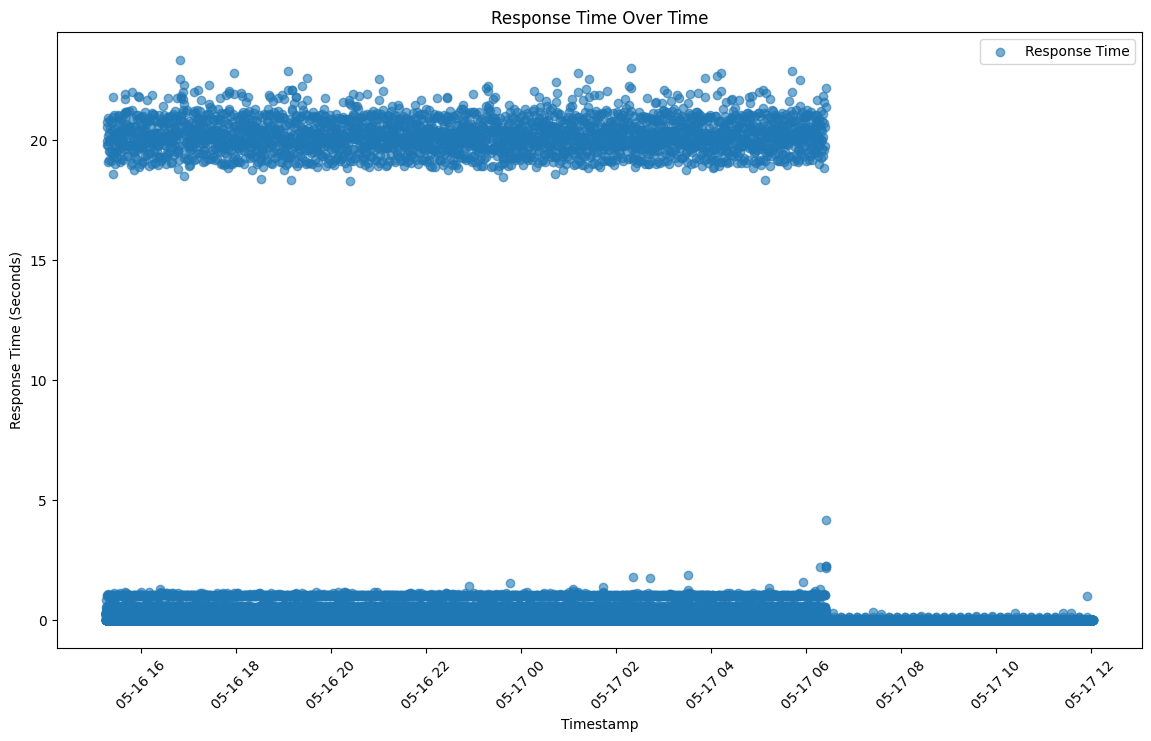

In [4]:
# Scatter plot of Response Time Over Time
plt.figure(figsize=(14, 8))
plt.scatter(df['timestamp'], df['response_time'], alpha=0.6, label='Response Time')
plt.title('Response Time Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Response Time (Seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_20163/3401281432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='log_level', order=df['log_level'].value_counts().index, palette='viridis')


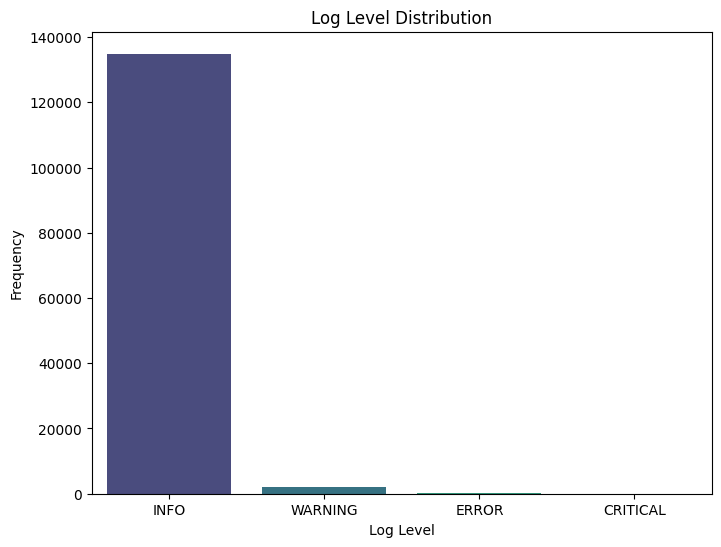

In [13]:
# Log Level Distribution as Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='log_level', order=df['log_level'].value_counts().index, palette='viridis')
plt.title('Log Level Distribution')
plt.xlabel('Log Level')
plt.ylabel('Frequency')
plt.show()


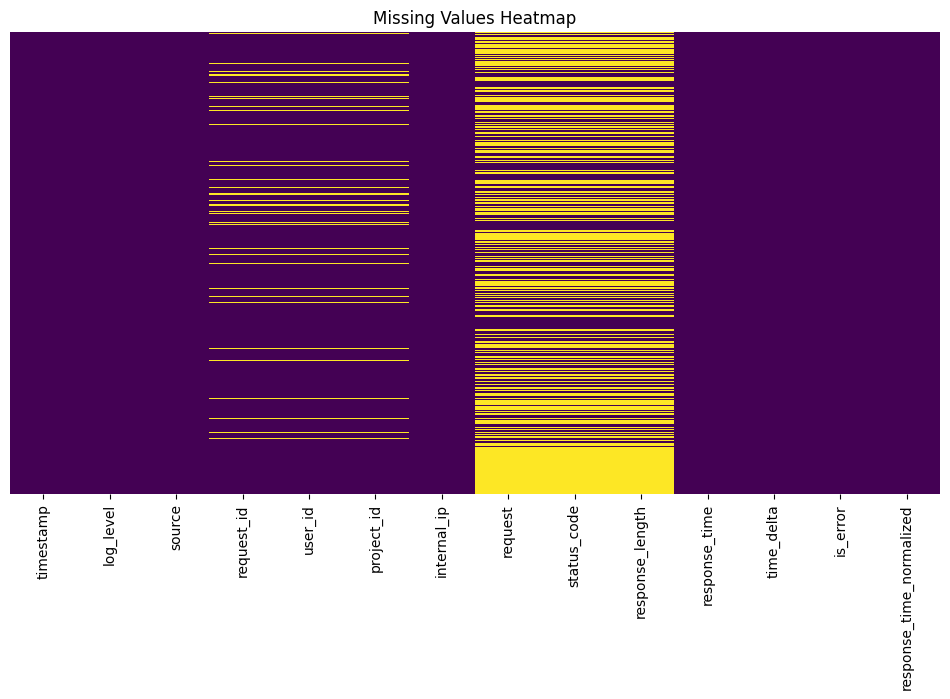

In [14]:
# Heatmap of Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


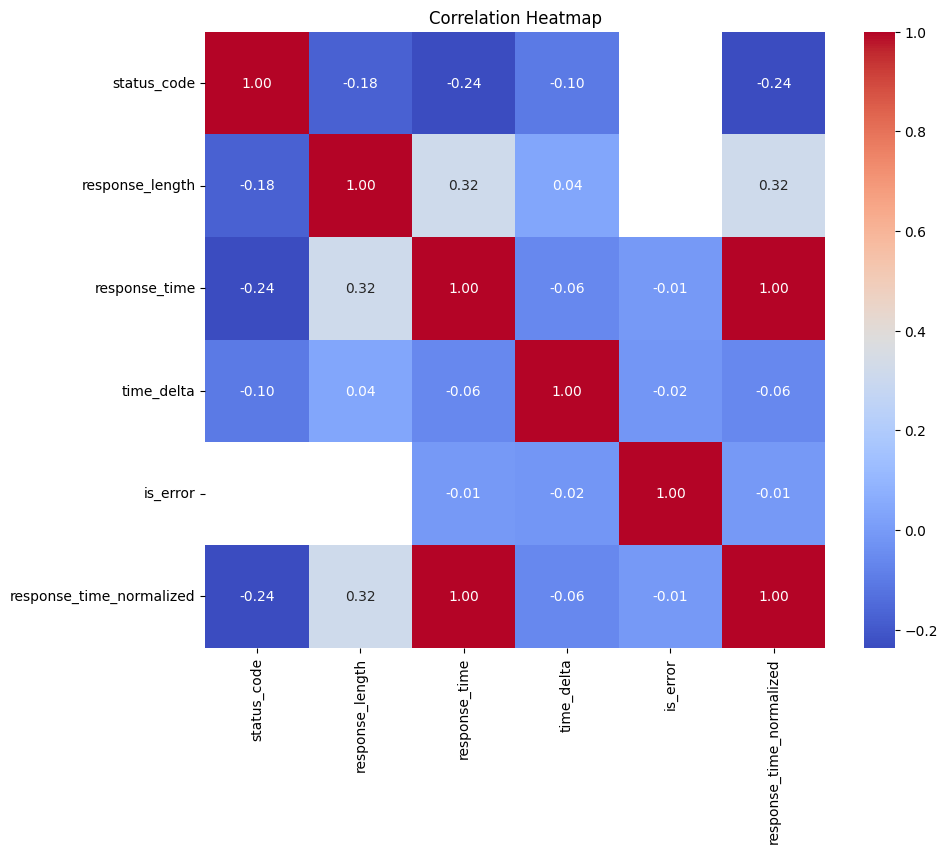

In [15]:
# Correlation Heatmap

# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



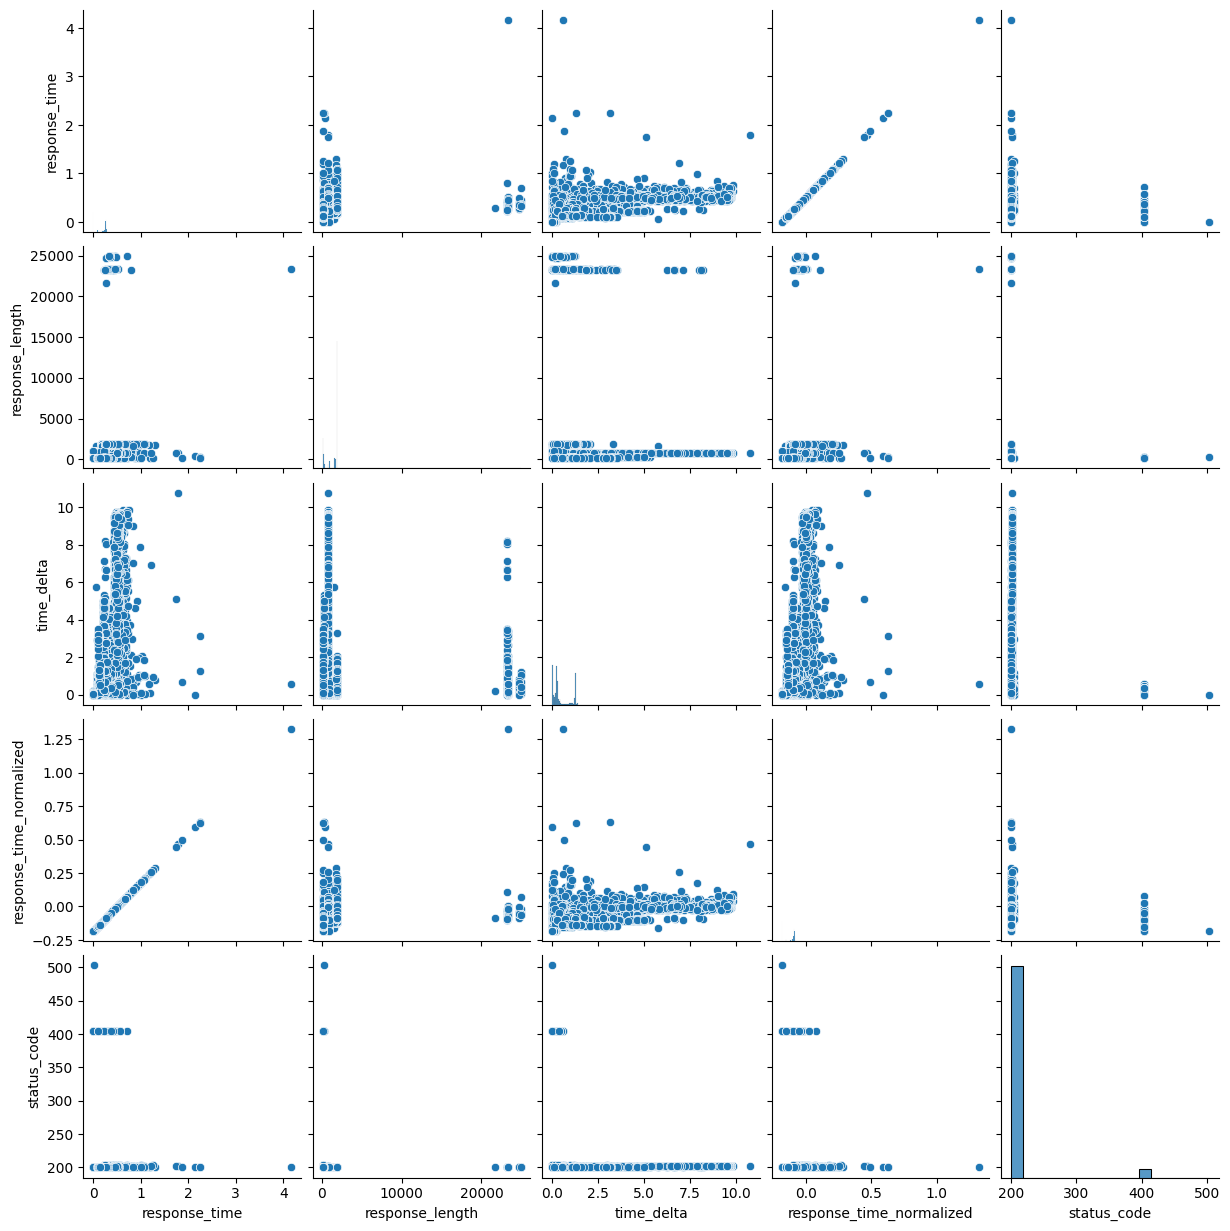

In [16]:
# Pairplot for Numerical Attributes
selected_columns = ['response_time', 'response_length', 'time_delta', 'response_time_normalized','status_code']
sns.pairplot(df[selected_columns].dropna())
plt.show()


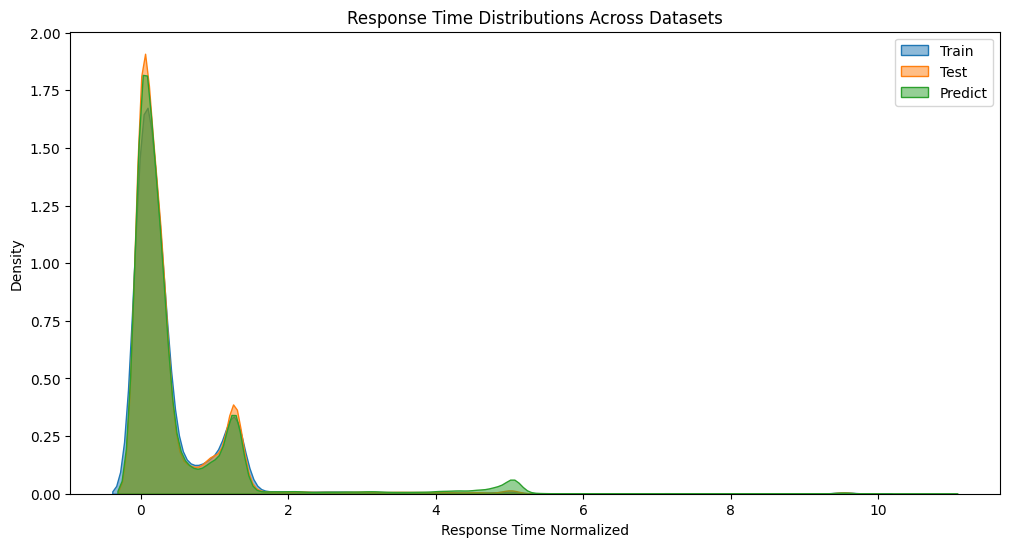

In [17]:
# comparing dataset features.

df_train = pd.read_csv("preprocessed/preprocessed_openstack_predict.csv")
df_test = pd.read_csv("preprocessed/preprocessed_openstack_test.csv")
df_predict = pd.read_csv("preprocessed/preprocessed_openstack_train.csv")

# Load datasets
datasets = {
  "Train": df_train,
  "Test": df_test,
  "Predict": df_predict
}

# Visualize response_time distributions
plt.figure(figsize=(12, 6))
for name, df in datasets.items():
    sns.kdeplot(df['time_delta'], label=name, fill=True, alpha=0.5)
plt.title('Response Time Distributions Across Datasets')
plt.xlabel('Response Time Normalized')
plt.ylabel('Density')
plt.legend()
plt.show()


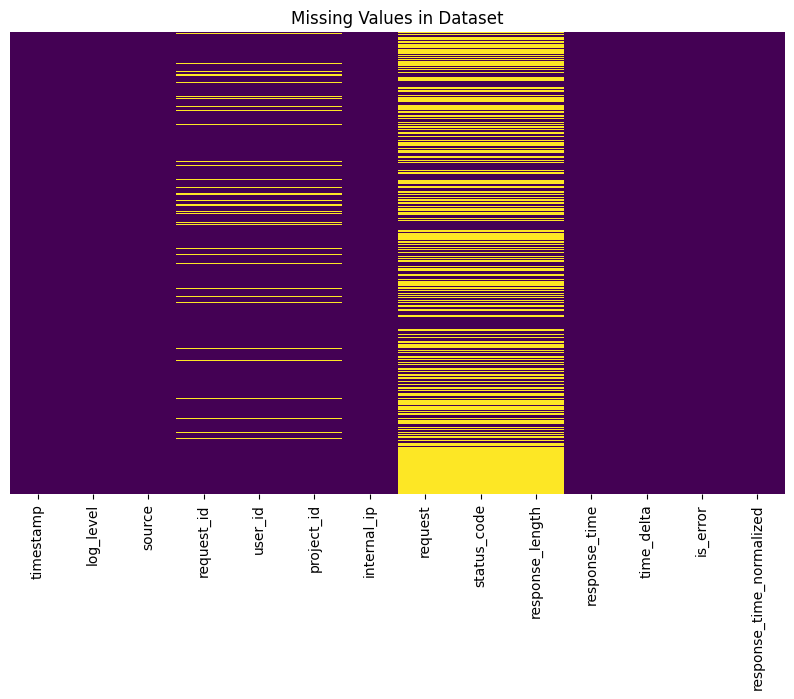

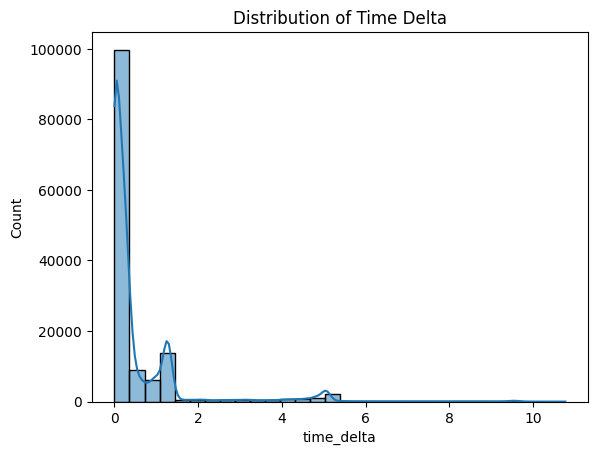

In [9]:

# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Dataset')
plt.show()

# Distribution of time_delta
sns.histplot(df['time_delta'], kde=True, bins=30)
plt.title('Distribution of Time Delta')
plt.show()
